## Pre-prunning & Post prunning

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


## let's apply pre-prunning (by stop building the tree after a certain depth)

In [3]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## Visualizing the tree

In [20]:
!pip install graphviz

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:
from sklearn.tree import export_graphviz
import mglearn

export_graphviz(tree, out_file = "tree.dot", class_names = ["malignant", "benign"], feature_names = cancer.feature_names,
               impurity = False, filled = True)

In [25]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

## Feature importance in trees

In [11]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


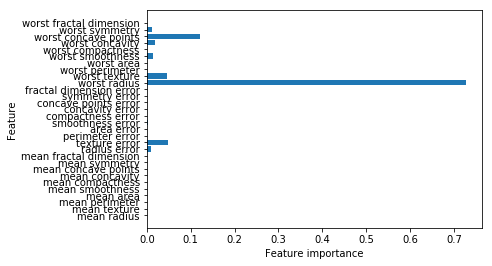

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

In [18]:
!pip install mglearn

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Two dimensional Dataset

Feature importances: [ 0.  1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

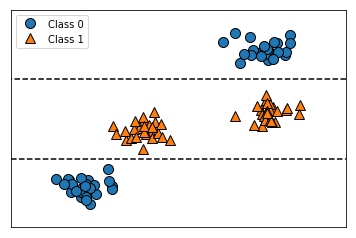

In [26]:
import mglearn 

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### Historical development of the price of RAM (plotted on log scale)

In [34]:
import pandas as pd
from sklearn.datasets import ram_price

ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

ImportError: cannot import name 'ram_price'

## Ensembles of Decision Trees
### Ensembles are methods that combine multiple machine learning models to create more powerful models. There're two ensemble models- 1. Random forests 2. Gradient boosted trees

## Random Forests 
### To build the random forest we need to decide the no. of trees to build (n_estimators)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

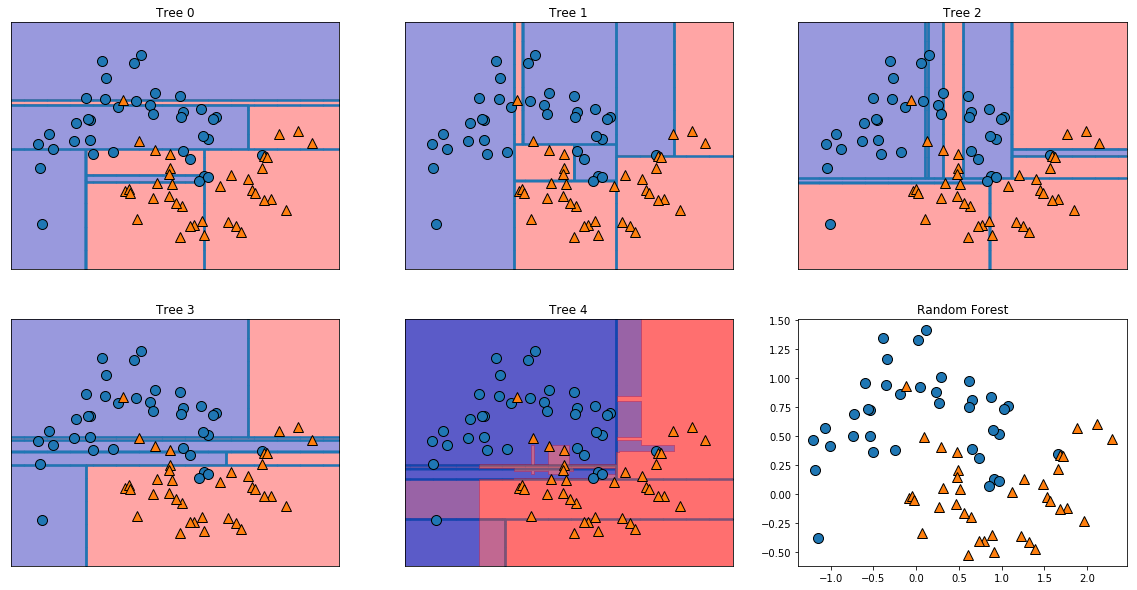

In [39]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax = axes[-1, 1], alpha = 0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

### Applying Random forest consisting 100 trees on Breast_Cancer dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


### Feature importances computed from a random forest that is fit to the Breast_Cancer dataset

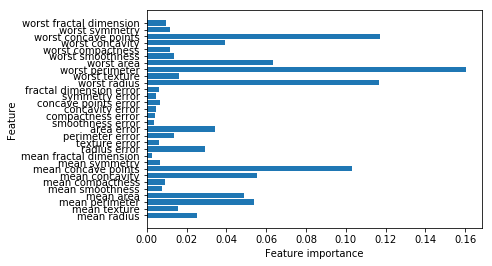

In [41]:
plot_feature_importances_cancer(forest)

## Gradient Boosted regression trees
Despite of regression in the name, these models can be used for classification along with regression

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


### To reduce overfitting, let's apply strong pre-prunning by limiting the maximum_depth or lower learning rate

In [44]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [46]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


### Plotting feature importances

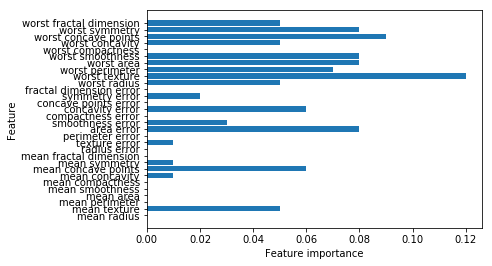

In [47]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)